In [2]:
import numpy as np
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='white', context='notebook', palette=colors, 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## ODEs
\begin{align}
\frac{d\lambda_1}{dt} &= \alpha_1 - \beta_1\lambda_1 -a_1\lambda_2\\
\frac{d\lambda_2}{dt} &= \alpha_2 + a_2\lambda_1 -a_3\lambda_2
\end{align}

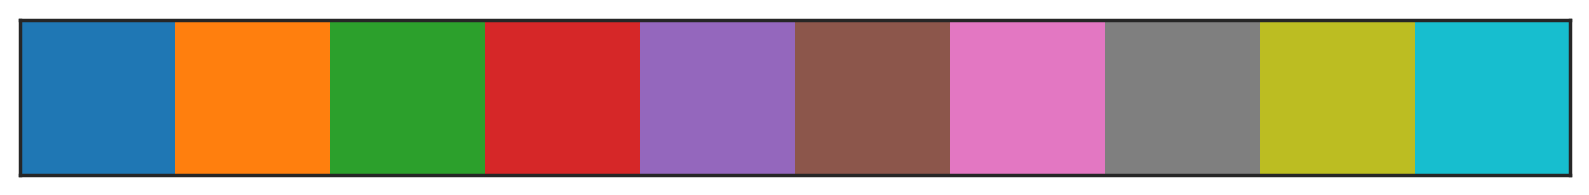

In [3]:
sns.palplot(colors)

In [4]:

def ODEs(lambdas, t, a1, a2, a3, alpha1, alpha2, beta1):
    lambda1, lambda2 = lambdas
    dl1dt =  alpha1 -beta1 * lambda1 - a1 * lambda2
    dl2dt = alpha2 + a2 * lambda1 - a3 * lambda2
    return np.array([dl1dt, dl2dt])


In [5]:
# Manually input values, removing beta1
# 
a1 = 0.098
a2 = 0.007
a3 = 0.19
alpha1 = 5.54
beta1 = 0.035
alpha2 = 1.98
s = 0

a1c = 0.55
a2c = 0.06
a3c = 0.57
alpha1c = 39.33
beta1c = 0.002
alpha2c = 40.8

args = (a1, a2, a3, alpha1, alpha2, beta1)
argsc = (a1c, a2c, a3c, alpha1c, alpha2c, beta1c)

## Nullclines

$\lambda_1$ Nullclines
\begin{align}
\frac{d\lambda_1}{dt} &= 0\\
\lambda_1 &= \frac{\alpha_1 - a_1\lambda_2}{\beta_1}\\
\lambda_1 &> 0\\
\Rightarrow \lambda_2 &< \frac{\alpha_1}{a_1}
\end{align}

$\lambda_2$ Nullclines
\begin{align}
\frac{d\lambda_2}{dt} &= 0\\
\lambda_2 &= \frac{\alpha_2 + a_2\lambda_1}{a_3}\\
\lambda_2 &> 0\\
\Rightarrow \lambda_1 &< - \frac{\alpha_2}{a_2}\\
\lambda_1 &= \frac{a_3 \lambda_2 - \alpha_2}{a_2}
\end{align}

## Fixed Point
 Fidn where the two nullclines intersect.
\begin{align}
\lambda_1 &= \frac{\alpha_1 - a_1\lambda_2}{\beta_1} = \frac{a_3 \lambda_2 - \alpha_2 }{a_2}\\
\lambda_2 &= \frac{a_2\alpha_1 + \beta_1 \alpha_2}{a_1a_2 + \beta_1a_3} 
\end{align}

In [6]:
def plot_null_clines(ax, l1_range, l2_range, a1, a2, a3, alpha1, alpha2, beta1, 
                            colors=[colors[3], colors[2]], lw=2):
    """Add nullclines to ax."""
    # lambda1-nullcline
    ncl1_l2 = np.linspace(l2_range[0], l2_range[1], 200)
    ncl1_l1 = (alpha1 - a1 * ncl1_l2) / beta1

    # lambda2-nullcline
    ncl2_l1 = np.linspace(l1_range[0], l1_range[1], 200)
    ncl2_l2 = (alpha2 + a2 * ncl2_l1) / a3

    # Plot
    ax.plot(ncl1_l1, ncl1_l2, lw=lw, color=colors[0], label='$\lambda_1$ nullcline')
    ax.plot(ncl2_l1, ncl2_l2, lw=lw, color=colors[1], label='$\lambda_2$ nullcline')
    
    return ax

In [7]:
def fp(a1, a2, a3, alpha1, alpha2, beta1):
    l2 = (a2 * alpha1 + beta1 * alpha2) / (a1 * a2 + beta1 * a3)
    l1 = (-alpha2 + a3 * l2) / a2
    return np.array([l1, l2])

def plot_fixed_point(ax, a1, a2, a3, alpha1, alpha2, beta1, \
                     label='fixed point', markeredgecolor='black', markerfacecolor= 'black'):
    """Add fixed points to plot."""
    # Compute fixed points
    fps = fp(a1, a2, a3, alpha1, alpha2, beta1)
    ax.plot(*fps, '.', markerfacecolor=markerfacecolor, markeredgecolor=markeredgecolor, 
                markeredgewidth=2, markersize=15, label=label)
        
    return ax

In [8]:
def plot_traj(ax, f, y0, t, args=(), color='red', lw=2, ls='-', 
              traj_label='trajectory', init_label='initial condition', show_init=True):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    y0 : array_like, shape (2,)
        Initial condition.
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    y = scipy.integrate.odeint(f, y0, t, args=args)
    
    ax.plot(*y.transpose(), ls=ls, color=color, lw=lw, label=traj_label)
    if show_init:
        ax.plot(*y0, '.', markerfacecolor='white', markeredgecolor=color, 
                    markeredgewidth=2, markersize=15, label=init_label)
    return ax

In [9]:
def plot_flow_field(ax, f, u_range, v_range, args=(), n_grid=200, plot_speed=True):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.75 and max of 4
    lw = None
    if plot_speed:
        lw = 0.75 + 3.25 * speed / speed.max()

    # Make stream plot
    #ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.5, density=1, color='thistle')
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=2.5, density=1, color='0.8', minlength=0.1)

    return ax

In [10]:
withdrawn_init = np.array([14.092750, 69.199379])
withdrug_init = np.array([97.372417, 17.516865])
t = np.linspace(0, 200, 1000)

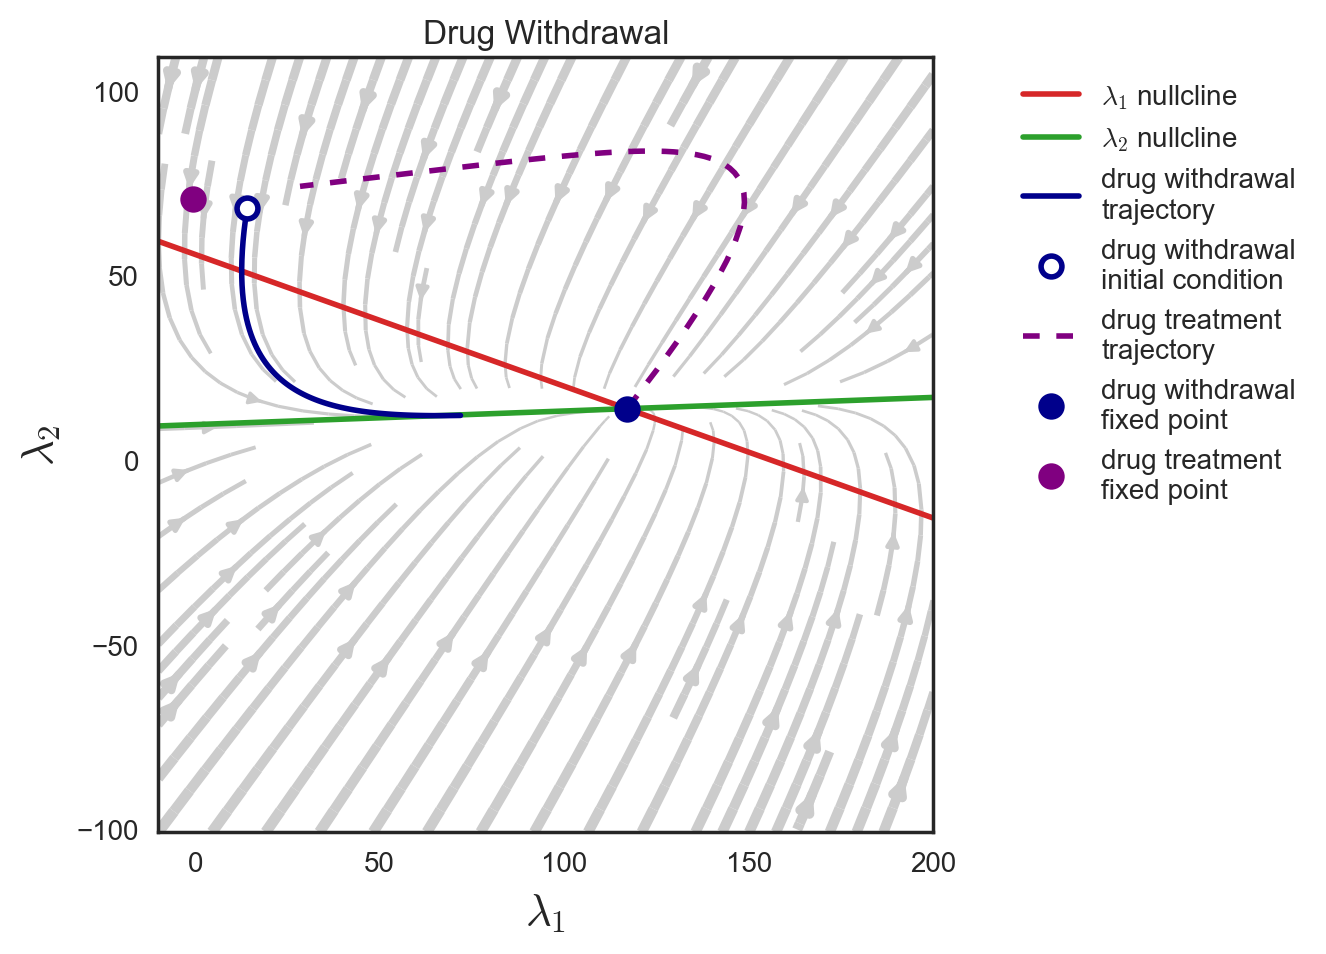

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_aspect('equal')

l1_range = (-10, 200)
l2_range = (-100, 110)
ax = plot_flow_field(ax, ODEs, l1_range, l2_range, args=args)
ax = plot_null_clines(ax, l1_range, l2_range, *args)

t = np.linspace(0, 29, 100)
ax = plot_traj(ax, ODEs, withdrawn_init, t, args, \
               traj_label='drug withdrawal\ntrajectory', init_label='drug withdrawal\ninitial condition', \
               color='darkblue')

t = np.linspace(0, 29, 100)
ax = plot_traj(ax, ODEs, fp(*args), t, argsc, \
               traj_label='drug treatment\ntrajectory', init_label='drug treatment\ninitial condition', \
               color='purple', ls='--', show_init=False)

ax = plot_fixed_point(ax, *args, label='drug withdrawal\nfixed point', \
                     markerfacecolor='darkblue', markeredgecolor='darkblue')

ax = plot_fixed_point(ax, *argsc, label='drug treatment\nfixed point', \
                      markerfacecolor='purple', markeredgecolor='purple')

ax.set_xlim(*l1_range)
ax.set_ylim(*l2_range)
ax.set_title('Drug Withdrawal')
ax.legend(bbox_to_anchor=(1.5,1))

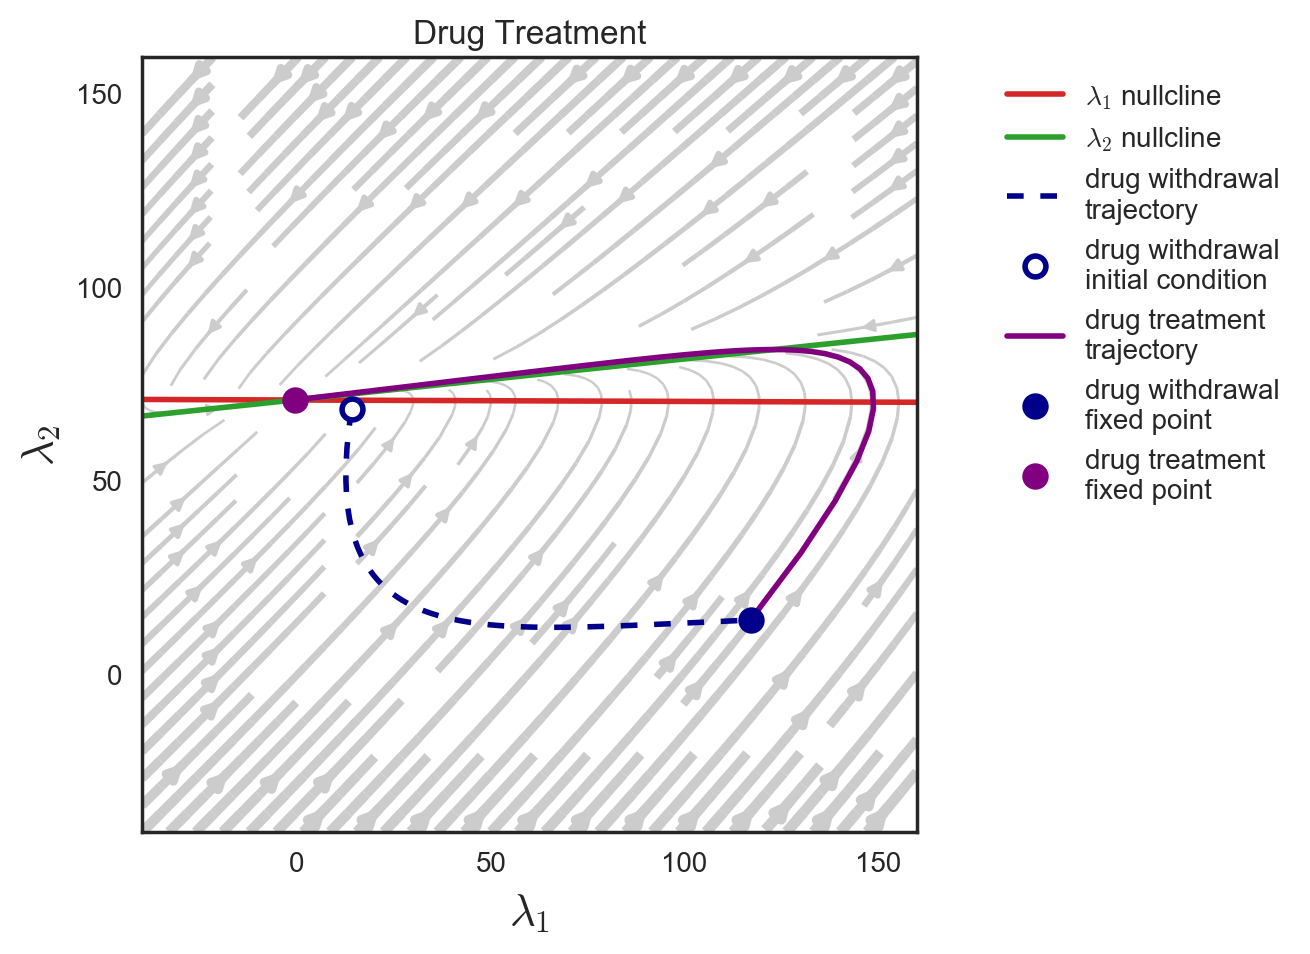

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_aspect('equal')

l1_range = (-40, 160)
l2_range = (-40, 160)
ax = plot_flow_field(ax, ODEs, l1_range, l2_range, args=argsc)
ax = plot_null_clines(ax, l1_range, l2_range, *argsc)

t = np.linspace(0, 200, 400)
ax = plot_traj(ax, ODEs, withdrawn_init, t, args, \
               traj_label='drug withdrawal\ntrajectory', init_label='drug withdrawal\ninitial condition', \
               color='darkblue', ls='--')

t = np.linspace(0, 200, 400)
ax = plot_traj(ax, ODEs, fp(*args), t, argsc, \
               traj_label='drug treatment\ntrajectory', init_label='drug treatment\ninitial condition', \
               color='purple', ls='-', show_init=False)

ax = plot_fixed_point(ax, *args, label='drug withdrawal\nfixed point', \
                     markerfacecolor='darkblue', markeredgecolor='darkblue')

ax = plot_fixed_point(ax, *argsc, label='drug treatment\nfixed point', \
                      markerfacecolor='purple', markeredgecolor='purple')

ax.set_xlim(*l1_range)
ax.set_ylim(*l2_range)
ax.set_title('Drug Treatment')
ax.legend(bbox_to_anchor=(1.5,1))

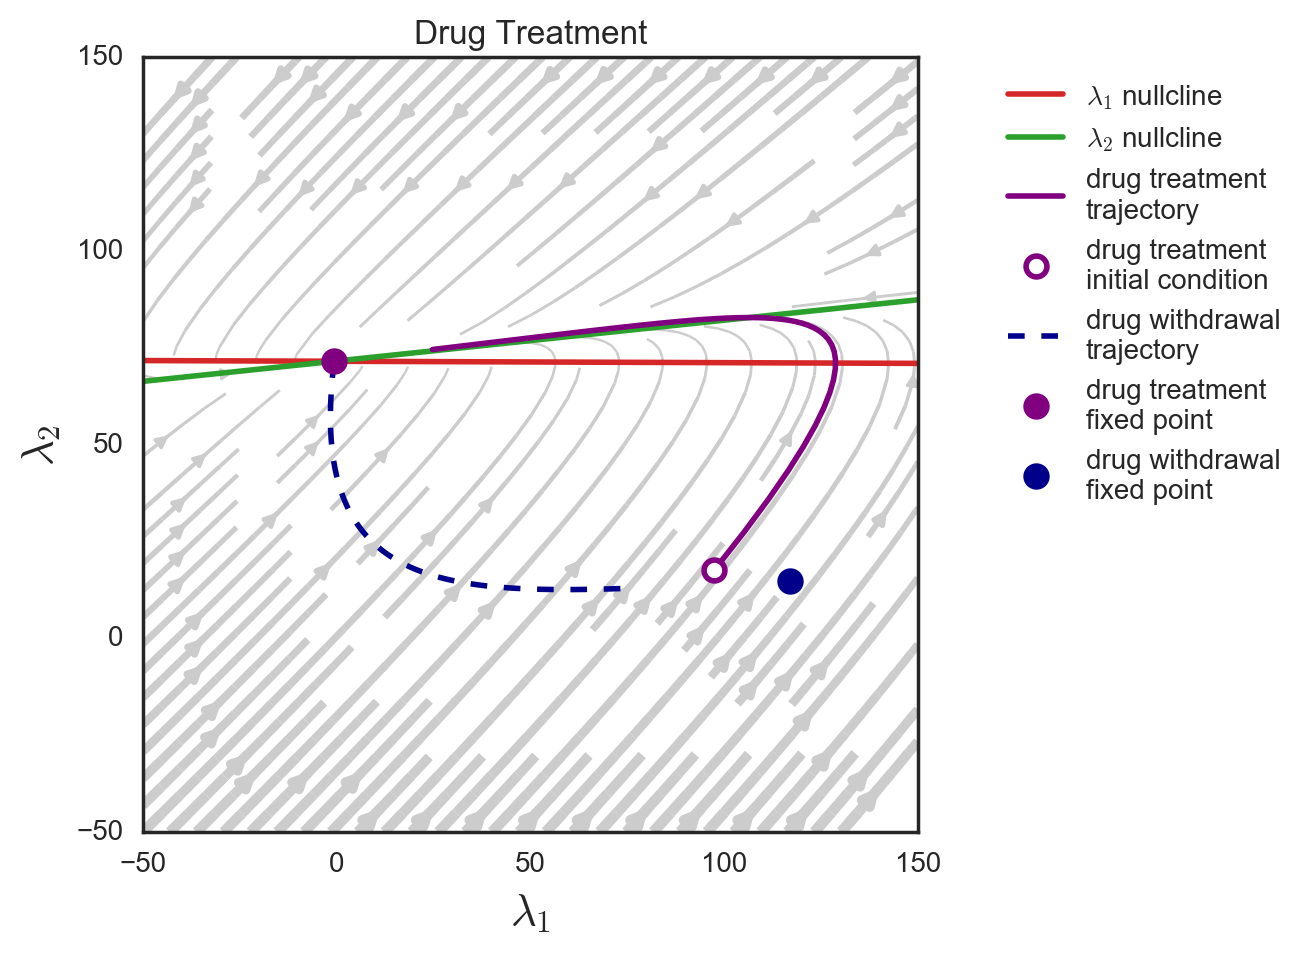

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_aspect('equal')

l1_range = (-50, 150)
l2_range = (-50, 150)
ax = plot_flow_field(ax, ODEs, l1_range, l2_range, args=argsc)
ax = plot_null_clines(ax, l1_range, l2_range, *argsc)

t = np.linspace(0, 29, 100)
ax = plot_traj(ax, ODEs, withdrug_init, t, argsc, \
               traj_label='drug treatment\ntrajectory', init_label='drug treatment\ninitial condition', \
               color='purple', ls='-')
t = np.linspace(0, 35, 100)
ax = plot_traj(ax, ODEs, fp(*argsc), t, args, \
               traj_label='drug withdrawal\ntrajectory', init_label='drug withdrawal\ninitial condition', \
               color='darkblue', ls='--', show_init=False)

ax = plot_fixed_point(ax, *argsc, label='drug treatment\nfixed point', \
                      markerfacecolor='purple', markeredgecolor='purple')

ax = plot_fixed_point(ax, *args, label='drug withdrawal\nfixed point', \
                     markerfacecolor='darkblue', markeredgecolor='darkblue')

ax.set_xlim(*l1_range)
ax.set_ylim(*l2_range)
ax.set_title('Drug Treatment')
ax.legend(bbox_to_anchor=(1.5,1))

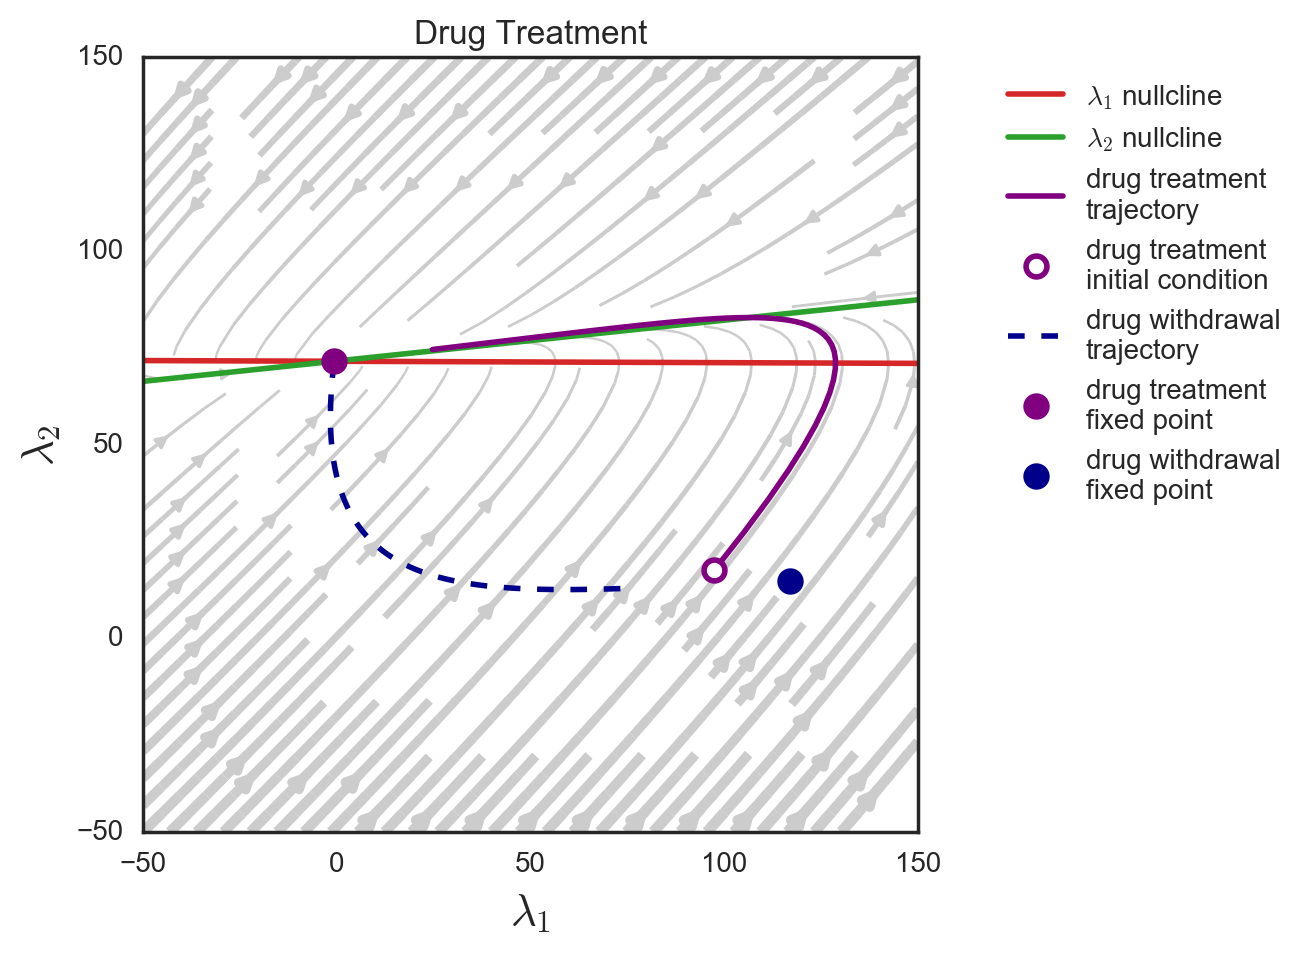

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_aspect('equal')

l1_range = (-50, 150)
l2_range = (-50, 150)
ax = plot_flow_field(ax, ODEs, l1_range, l2_range, args=argsc)
ax = plot_null_clines(ax, l1_range, l2_range, *argsc)

t = np.linspace(0, 29, 100)
ax = plot_traj(ax, ODEs, withdrug_init, t, argsc, \
               traj_label='drug treatment\ntrajectory', init_label='drug treatment\ninitial condition', \
               color='purple', ls='-')
t = np.linspace(0, 35, 100)
ax = plot_traj(ax, ODEs, fp(*argsc), t, args, \
               traj_label='drug withdrawal\ntrajectory', init_label='drug withdrawal\ninitial condition', \
               color='darkblue', ls='--', show_init=False)

ax = plot_fixed_point(ax, *argsc, label='drug treatment\nfixed point', \
                      markerfacecolor='purple', markeredgecolor='purple')

ax = plot_fixed_point(ax, *args, label='drug withdrawal\nfixed point', \
                     markerfacecolor='darkblue', markeredgecolor='darkblue')

ax.set_xlim(*l1_range)
ax.set_ylim(*l2_range)
ax.set_title('Drug Treatment')
ax.legend(bbox_to_anchor=(1.5,1))

In [23]:
def plot_separatrix_toggle(ax, a_range, b_range, beta, gamma, n, t_max=30, eps=1e-6, 
                           color='tomato', lw=3):
    """
    Plot separatrix on phase portrait.
    """
    # Compute fixed points
    fps = fp_toggle(beta, gamma, n)
    
    # If only one fixed point, no separatrix
    if len(fps) == 1:
        return ax
    
    # Negative time function to integrate to compute separatrix
    def rhs(ab, t):
        # Unpack variables
        a, b = ab
    
        # Stop integrating if we get the edge of where we want to integrate
        if a_range[0] < a < a_range[1] and b_range[0] < b < b_range[1]:
            return -toggle(ab, t, beta, gamma, n)
        else:
            return np.array([0, 0])

    # Parameters for building separatrix
    t = np.linspace(0, t_max, 400)

    # Build upper right branch of separatrix
    ab0 = fps[1] + eps
    ab_upper = scipy.integrate.odeint(rhs, ab0, t)

    # Build lower left branch of separatrix
    ab0 = fps[1] - eps
    ab_lower = scipy.integrate.odeint(rhs, ab0, t)

    # Concatenate, reversing lower so points are sequential
    sep_a = np.concatenate((ab_lower[::-1,0], ab_upper[:,0]))
    sep_b = np.concatenate((ab_lower[::-1,1], ab_upper[:,1]))
    
    # Plot
    ax.plot(sep_a, sep_b, '-', color=color, lw=lw)
    
    return ax